# Stage 2: Data Exploration & Preliminary Analysis

**Objective:** Explore relationships in the cleaned dataset and test the hypothesis that CO₂ emissions can be predicted by features such as energy use, GDP, and land use.

We'll generate summary stats, visualizations, and extract insights to inform predictive modeling in Stage 3.


# 1. Import libraries and dataset 

In [1]:
# import all the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor


# import the cleaned dataset from a csv file
data = pd.read_csv(r'cleaned_climate_data.csv')

# 2. Global overview of the available data


In [2]:
# A global overview of the imported data yields the following insights:

print("Shape of the dataset:")
data.shape

Shape of the dataset:


(1327, 19)

In [3]:
print("available columns and their data types:")
data.dtypes

available columns and their data types:


Country code                                                      object
Year                                                               int64
cereal_yield_(kg_per_hectare)                                    float64
co2_emissions,_total_(ktco2)                                     float64
co2_emissions_per_capita_(metric_tons)                           float64
co2_emissions_per_units_of_gdp_(kg/$1,000_of_2005_ppp_$)         float64
energy_use_per_capita_(kilograms_of_oil_equivalent)              float64
energy_use_per_units_of_gdp_(kg_oil_eq./$1,000_of_2005_ppp_$)    float64
foreign_direct_investment,_net_inflows_(%_of_gdp)                float64
gdp_($)                                                          float64
gni_per_capita_(atlas_$)                                         float64
nationally_terrestrial_protected_areas_(%_of_total_land_area)    float64
population                                                       float64
population_growth_(annual_%)                       

In [ ]:
print("Overview of the first 15 rows:")
data.head()


Overview of the first 5 rows:


,Country code,Year,cereal_yield_(kg_per_hectare),"co2_emissions,_total_(ktco2)",co2_emissions_per_capita_(metric_tons),"co2_emissions_per_units_of_gdp_(kg/$1,000_of_2005_ppp_$)",energy_use_per_capita_(kilograms_of_oil_equivalent),"energy_use_per_units_of_gdp_(kg_oil_eq./$1,000_of_2005_ppp_$)","foreign_direct_investment,_net_inflows_(%_of_gdp)",gdp_($),gni_per_capita_(atlas_$),nationally_terrestrial_protected_areas_(%_of_total_land_area),population,population_growth_(annual_%),population_in_urban_agglomerations_>1million_(%),ratio_of_girls_to_boys_in_primary_&_secondary_school_(%),"under-five_mortality_rate_(per_1,000)",urban_population,urban_population_growth_(annual_%)
0,AGO,1998,701.6,7308.331,0.556263,211.871013,519.274349,197.782664,17.283736,6.445192e+09,460.0,12.399827,13138265.0,2.669046,17.421341,82.045,207.9,6.174985e+06,4.819667
1,ARE,1990,2216.4,52009.061,28.755863,547.419170,11258.132345,214.318643,-0.344157,3.365323e+10,20720.0,0.266885,1808642.0,5.653214,26.135686,103.860,21.5,1.430636e+06,5.476379
2,ARE,1991,1594.0,57010.849,29.851550,598.807980,12262.388130,245.977706,0.076475,3.391964e+10,19340.0,0.266886,1909812.0,5.442852,26.377204,104.111,20.5,1.507988e+06,5.265704
3,ARE,1992,2315.3,58136.618,28.864884,594.636182,11058.790176,227.818578,0.366309,3.541269e+10,19430.0,0.266889,2014095.0,5.316516,26.656886,103.977,19.4,1.587510e+06,5.139053
4,ARE,1993,858.5,65980.331,31.097802,680.992757,11039.320754,241.743692,1.122721,3.574530e+10,18550.0,0.267616,2121704.0,5.204958,26.964930,103.984,18.3,1.669357e+06,5.027180


In [5]:
print("Descriptive statistics:")
data.describe().T

Descriptive statistics:


,count,mean,std,min,25%,50%,75%,max
Year,1327.0,2.000332e+03,5.321946e+00,1.990000e+03,1.996000e+03,2.001000e+03,2.005000e+03,2.008000e+03
cereal_yield_(kg_per_hectare),1327.0,3.291647e+03,1.885281e+03,1.757000e+02,1.896450e+03,2.829300e+03,4.319400e+03,9.184900e+03
"co2_emissions,_total_(ktco2)",1327.0,8.572976e+05,3.042731e+06,7.077310e+02,2.627589e+04,7.211889e+04,3.541699e+05,3.064936e+07
co2_emissions_per_capita_(metric_tons),1327.0,5.457996e+00,5.502212e+00,2.941071e-02,1.168976e+00,4.073331e+00,8.094039e+00,3.710650e+01
"co2_emissions_per_units_of_gdp_(kg/$1,000_of_2005_ppp_$)",1327.0,4.737516e+02,3.585085e+02,4.555259e+01,2.673860e+02,3.716327e+02,5.835089e+02,3.029130e+03
energy_use_per_capita_(kilograms_of_oil_equivalent),1327.0,2.283099e+03,2.152786e+03,1.209964e+02,6.601667e+02,1.575621e+03,3.453208e+03,1.243865e+04
"energy_use_per_units_of_gdp_(kg_oil_eq./$1,000_of_2005_ppp_$)",1327.0,2.369667e+02,1.663571e+02,6.633537e+01,1.334530e+02,1.937590e+02,2.683514e+02,1.364071e+03
"foreign_direct_investment,_net_inflows_(%_of_gdp)",1327.0,3.351709e+00,5.170648e+00,-1.502768e+01,9.053249e-01,2.203875e+00,3.932248e+00,9.249893e+01
gdp_($),1327.0,1.027847e+12,3.888092e+12,9.826326e+08,2.121062e+10,1.105627e+11,4.278346e+11,5.580488e+13
gni_per_capita_(atlas_$),1327.0,9.763997e+03,1.260601e+04,9.000000e+01,1.040000e+03,3.140000e+03,1.746000e+04,5.862000e+04


# 3. Used feature/column abbreviations

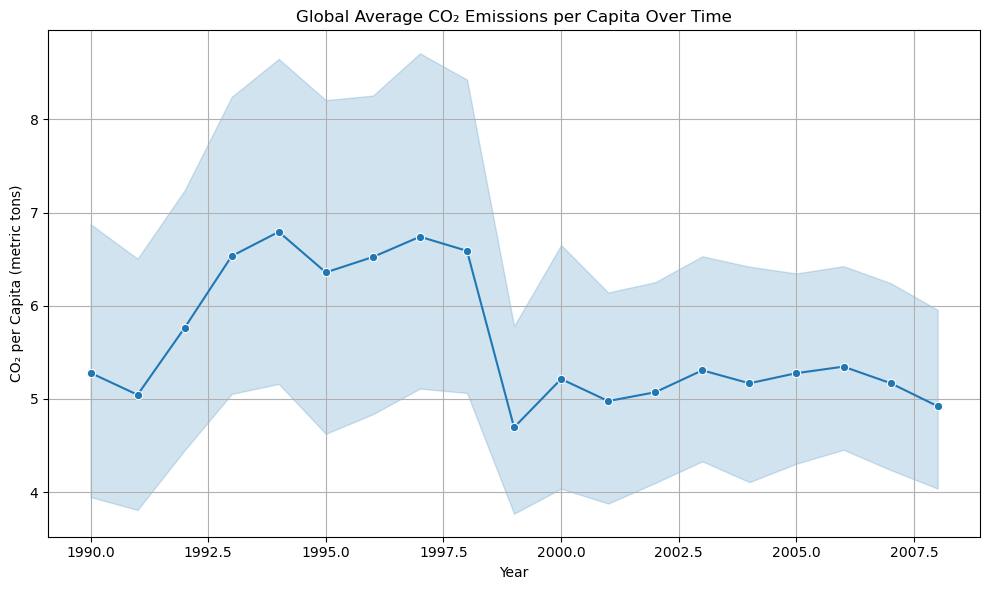

In [ ]:
#  Global Average CO₂ Emissions per Capita Over Time – Chart Explanation
# This line chart shows the global average CO₂ emissions per capita (in metric tons) from 1991 to 2008.

# Group by Year and calculate mean CO₂ per capita
df_yearly_avg = data.groupby('Year')['co2_emissions_per_capita_(metric_tons)'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Year', y='co2_emissions_per_capita_(metric_tons)', marker='o')
plt.title('Global Average CO₂ Emissions per Capita Over Time')
plt.ylabel('CO₂ per Capita (metric tons)')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

Key Components

Blue Line with Markers:
Represents the mean CO₂ emissions per capita globally for each year.

Shaded Blue Area (Confidence Band):
Indicates the variation or uncertainty (e.g., standard deviation or confidence interval) around the average.
A wider band means greater variability among countries in that year.

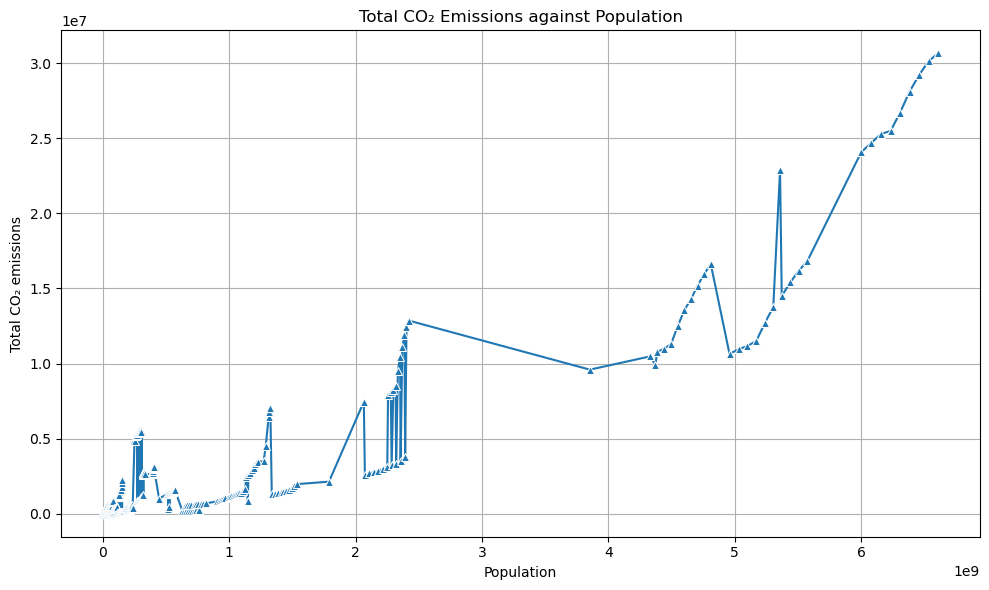

In [7]:
#  Total CO₂ Emissions vs Population – Chart
# This scatter plot illustrates the relationship between a country's total CO₂ emissions and its population.

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='population', y='co2_emissions,_total_(ktco2)', marker='^')
plt.title('Total CO₂ Emissions against Population')
plt.ylabel('Total CO₂ emissions')
plt.xlabel('Population')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Hypothesis Definition
The dataset includes various country-level features categorized as:

* Emissions: CO₂, CH₄, N₂O, etc.
* Population metrics: total population, urban %, growth
* Economic indicators: GDP, GNI, FDI
* Land use: cereal yield, agricultural land, protected areas
* Climate data: precipitation, natural disasters
* Energy use
* Health metrics: medical personnel count
* ...and others

---

*** Project Goal
To explore how factors like economy, energy use, and land use influence emissions and climate indicators. Ultimately, develop a predictive ML model for emissions or climate data using the above features.

---

*** Hypothesis
CO₂ emissions are influenced by country-specific features such as energy use, population metrics, GDP, FDI, and land use — and can be predicted from them.

In this study, CO₂ emissions will be treated as the dependent variable, and we’ll assess how it relates to other available features.

# 5. Feature engineering
The available columns reveal that the features representing CO2 emissions and energy use have three different reference values:

per capita: co2_emissions_per_capita_(metric_tons) and energy_use_per_capita_(kilograms_of_oil_equivalent)
per unit of GDP: co2_emissions_per_units_of_gdp_(kg/$1,000_of_2005_ppp_$) and energy_use_per_units_of_gdp_(kg_oil_eq./$1,000_of_2005_ppp_$)
total values: co2_emissions,_total_(ktco2)

In [8]:
# Create a column for the total energy use:

# create a column for the total energy use
data['en_ttl'] = data['energy_use_per_units_of_gdp_(kg_oil_eq./$1,000_of_2005_ppp_$)'] * data['gdp_($)'] /1000

In [9]:
# Rename dictionary for raw column names
rename_dict = {
    'Country code': 'country',
    'Year': 'year',
    'cereal_yield_(kg_per_hectare)': 'cereal_yield',
    'co2_emissions,_total_(ktco2)': 'co2_ttl',
    'co2_emissions_per_capita_(metric_tons)': 'co2_per_cap',
    'co2_emissions_per_units_of_gdp_(kg/$1,000_of_2005_ppp_$)': 'co2_per_gdp',
    'energy_use_per_capita_(kilograms_of_oil_equivalent)': 'en_per_cap',
    'energy_use_per_units_of_gdp_(kg_oil_eq./$1,000_of_2005_ppp_$)': 'en_per_gdp',
    'foreign_direct_investment,_net_inflows_(%_of_gdp)': 'fdi_perc_gdp',
    'gdp_($)': 'gdp',
    'gni_per_capita_(atlas_$)': 'gni_per_cap',
    'nationally_terrestrial_protected_areas_(%_of_total_land_area)': 'prot_area_perc',
    'population': 'pop',
    'population_growth_(annual_%)': 'pop_growth_perc',
    'population_in_urban_agglomerations_>1million_(%)': 'pop_urb_aggl_perc',
    'ratio_of_girls_to_boys_in_primary_&_secondary_school_(%)': 'edu_gender_ratio',
    'under-five_mortality_rate_(per_1,000)': 'mortality_u5',
    'urban_population': 'urban_pop',
    'urban_population_growth_(annual_%)': 'urb_pop_growth_perc'
}


In [10]:
# Apply clean column names
data.rename(columns=rename_dict, inplace=True)


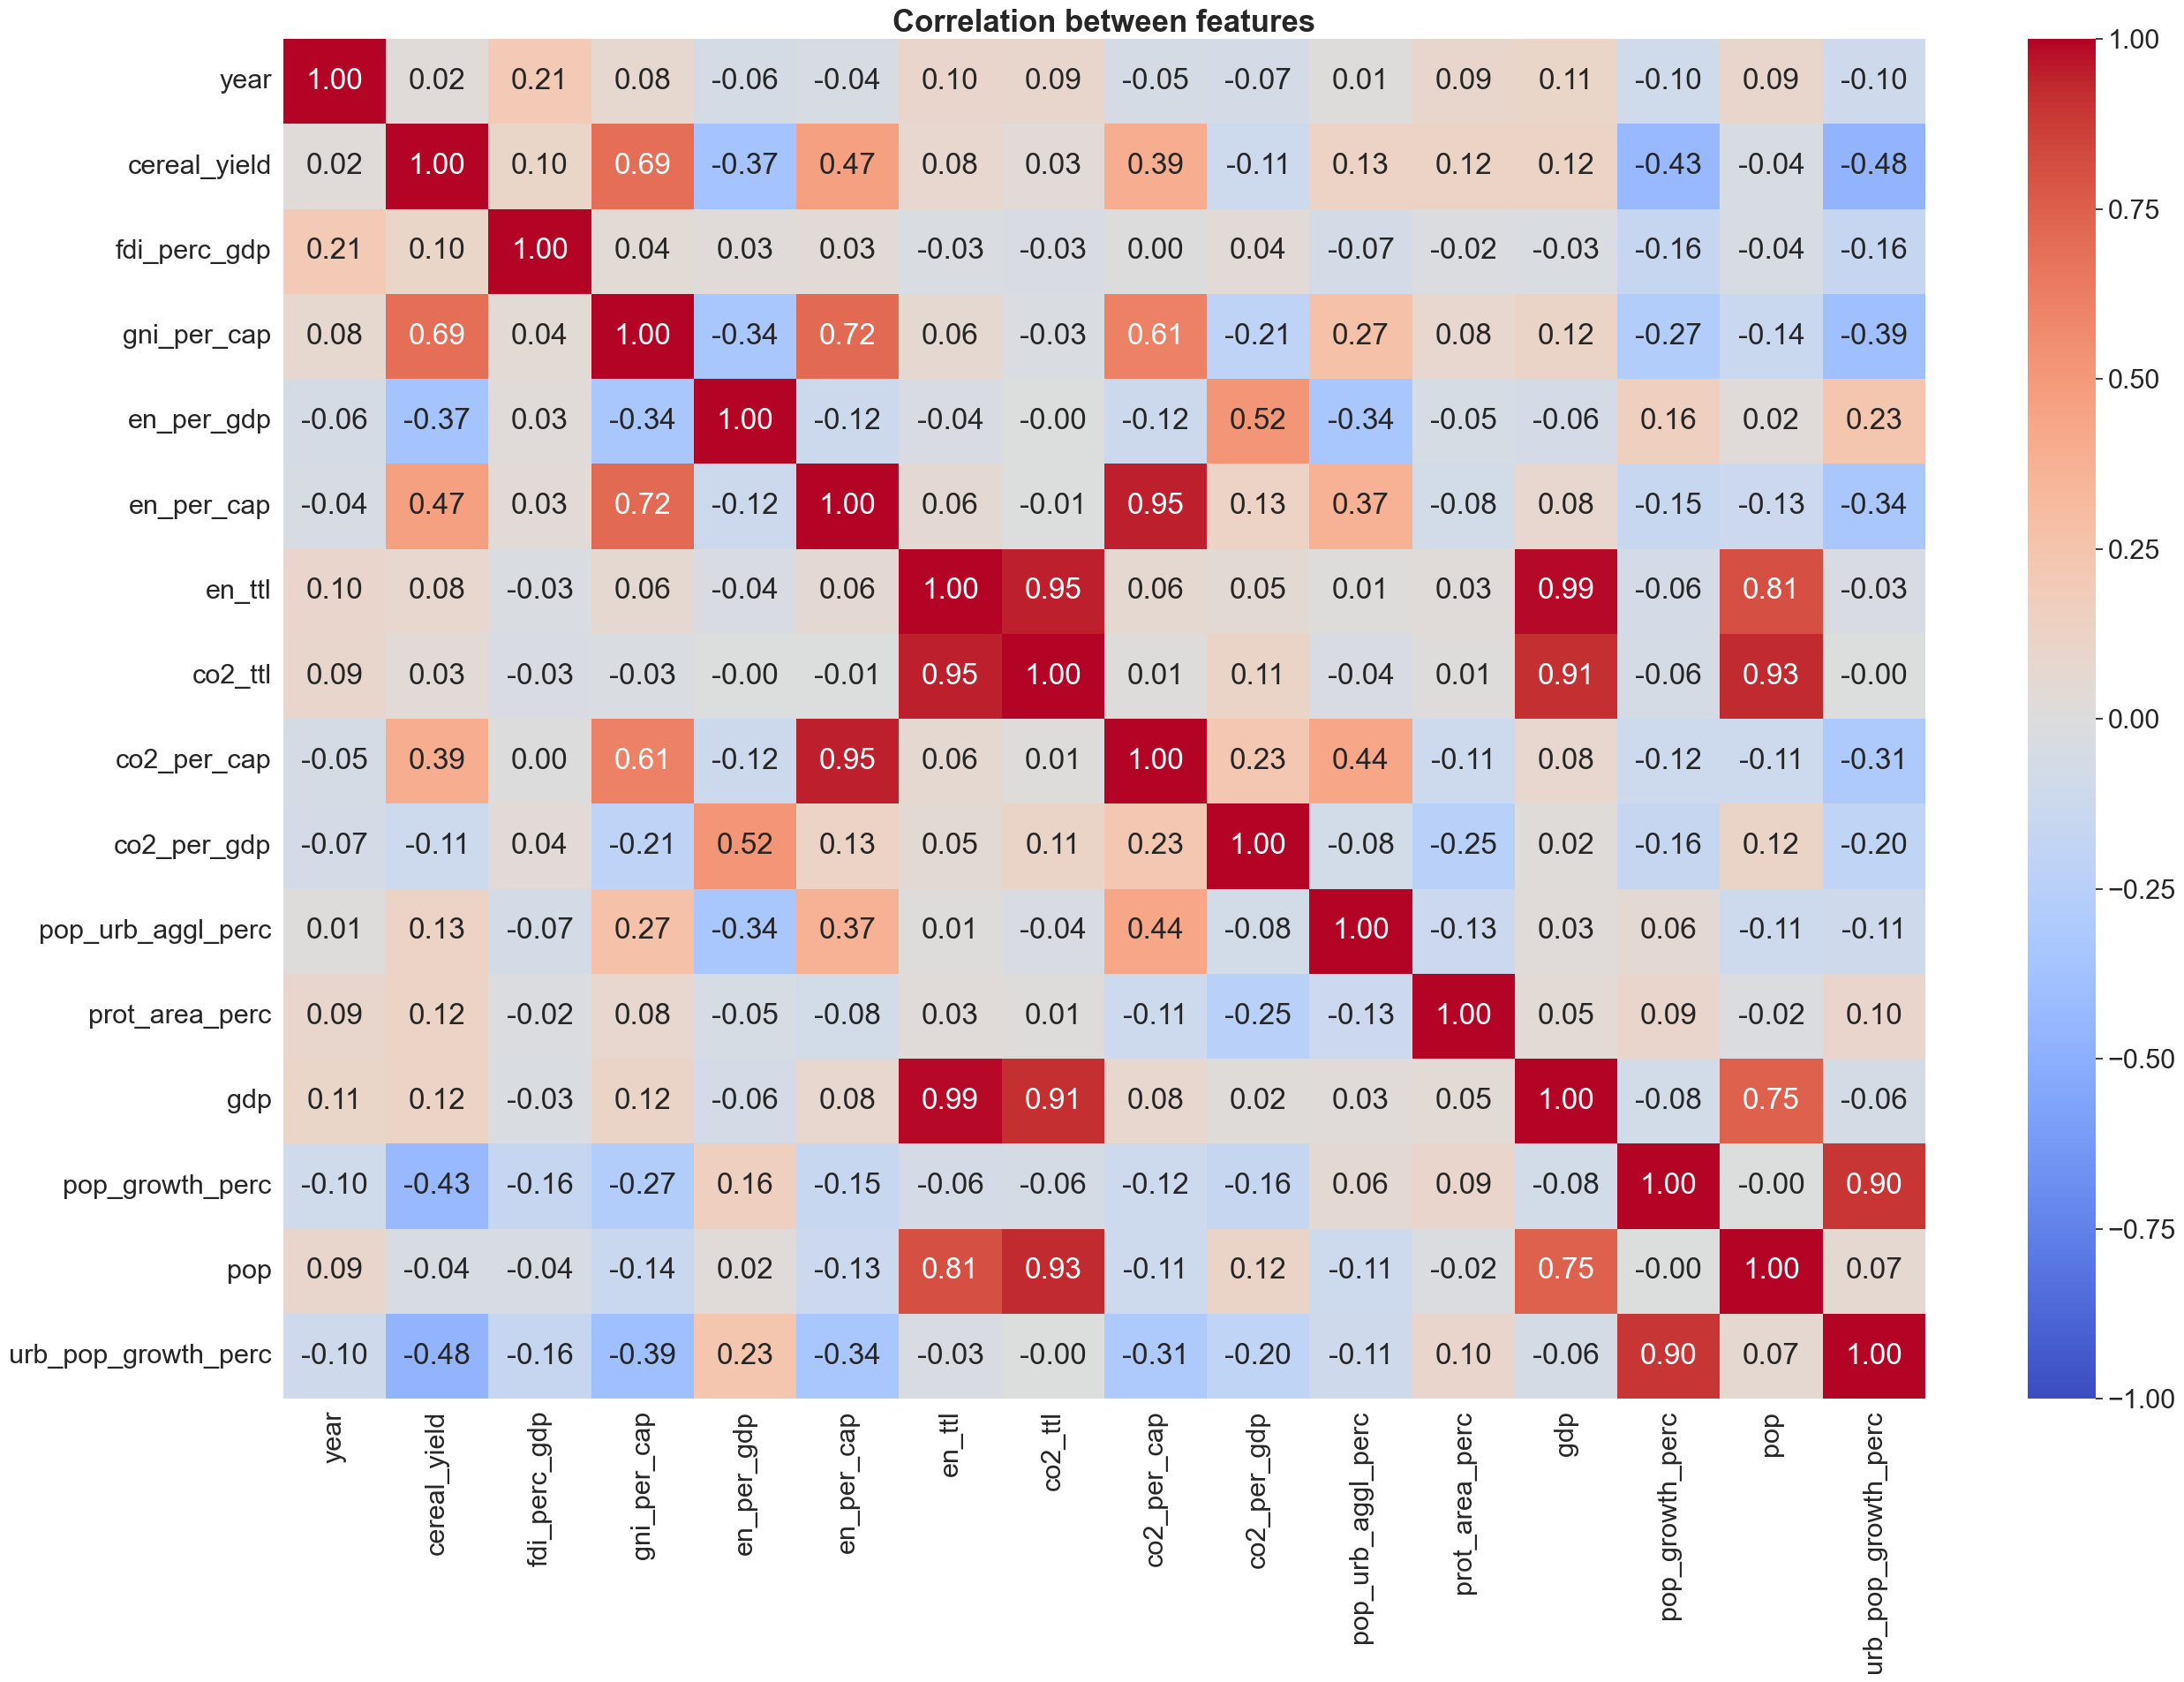

In [11]:
# Choosing the Best Unit for CO₂ Emissions & Energy Use
# To determine the most meaningful unit for CO₂ emissions and energy use, we analyze their correlations with other variables.

# Goal: Identify the units (e.g., per capita, total, per GDP) that show the strongest and broadest correlations with other country-level features.

# select all features
features_all = data[['country','year','cereal_yield','fdi_perc_gdp','gni_per_cap',
                     'en_per_gdp', 'en_per_cap', 'en_ttl', 'co2_ttl', 'co2_per_cap',
                     'co2_per_gdp', 'pop_urb_aggl_perc', 'prot_area_perc', 'gdp',
                     'pop_growth_perc', 'pop', 'urb_pop_growth_perc']]

# plot a correlation of all features
# correlation matrix
sns.set_theme(font_scale=2)
f,ax=plt.subplots(figsize=(30,20))
sns.heatmap(features_all.drop(['country'], axis=1).corr(), annot=True, cmap='coolwarm', fmt = ".2f", 
            center=0, vmin=-1, vmax=1)
plt.title('Correlation between features', fontsize=25, weight='bold' )
plt.show()

sns.set_theme(font_scale=1)

In [12]:
features_for_vif = data[['cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'co2_per_cap',
                     'pop_urb_aggl_perc', 'prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc']]


vif_data = pd.DataFrame()
vif_data["feature"] = features_for_vif.columns # Use the columns from the features_for_vif DataFrame
vif_data["VIF"] = [variance_inflation_factor(features_for_vif.values, i)
                   for i in range(features_for_vif.shape[1])] # Use the values and number of columns from features_for_vif
print(vif_data)

               feature        VIF
0         cereal_yield   1.568204
1         fdi_perc_gdp   0.992662
2          gni_per_cap   3.081362
3           en_per_cap  13.755509
4          co2_per_cap  11.722891
5    pop_urb_aggl_perc   1.089663
6       prot_area_perc   1.017829
7                  gdp   1.099981
8      pop_growth_perc   6.403460
9  urb_pop_growth_perc   5.752966


In [13]:
features = features_all[['cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'co2_per_cap',
                     'pop_urb_aggl_perc', 'prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc']]

# 6. Prepare the visualizations
Plotting preparation
Ensure easier labeling of the plots
In order to make the labeling of the variables within plots easier in the code, a dictionary with the column names and variable labels to use on axes is defined:

In [14]:
# a dictionary with feature labels
labels_dict = {'gni_per_cap':'GNI per capita [Atlas $]',
               'gdp':'Gross Domestic Product [$]',
               'cereal_yield':'Cereal yield [kg/ha]',
               'prot_area_perc': 'Nationally terrestrial protected areas [% of total land area]',
               'fdi_perc_gdp': 'Foreign Direct Investment [% of GDP]',
               'pop_urb_aggl_perc': 'Population in urban agglomerations > 1mln [%]',
               'urb_pop_growth_perc':'Urban population growth [annual %]',
               'pop_growth_perc': 'Population growth [annual %]',
               'co2_per_cap':'CO2 emissions per capita [t]',
               'en_per_cap':'Energy use per capita [kg oil eq]' }

In [15]:
# Choose a subset of countries to plot
#The big amount of data points will result in slower processing of the plot and in a less clear representation. This can be avoided by choosing roughly half of the countries just for the paired scatter plot:

# get unique values in country column

unique_countries = data['country'].unique()
unique_countries

array(['AGO', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BEL', 'BGD',
       'BGR', 'BLR', 'BOL', 'BRA', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV',
       'CMR', 'COG', 'COL', 'CRI', 'CZE', 'DEU', 'DNK', 'DOM', 'DZA',
       'ECA', 'ECU', 'EGY', 'EMU', 'ESP', 'ETH', 'FIN', 'FRA', 'GBR',
       'GEO', 'GHA', 'GRC', 'GTM', 'HND', 'HUN', 'IDN', 'IND', 'IRL',
       'IRN', 'IRQ', 'ISR', 'ITA', 'JOR', 'JPN', 'KAZ', 'KEN', 'KHM',
       'KOR', 'KWT', 'LAC', 'LBN', 'LBY', 'LIC', 'LMC', 'LMY', 'MAR',
       'MEX', 'MIC', 'MNA', 'MOZ', 'MYS', 'NGA', 'NIC', 'NLD', 'NZL',
       'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PRY', 'ROM', 'RUS',
       'SAS', 'SAU', 'SDN', 'SEN', 'SLV', 'SRB', 'SSA', 'SWE', 'SYR',
       'TGO', 'THA', 'TUR', 'TZA', 'UKR', 'UMC', 'URY', 'USA', 'UZB',
       'VEN', 'VNM', 'WLD', 'YEM', 'ZAF', 'ZAR', 'ZMB'], dtype=object)

C:\Users\HP\AppData\Local\Temp\ipykernel_28512\1868127347.py:19: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


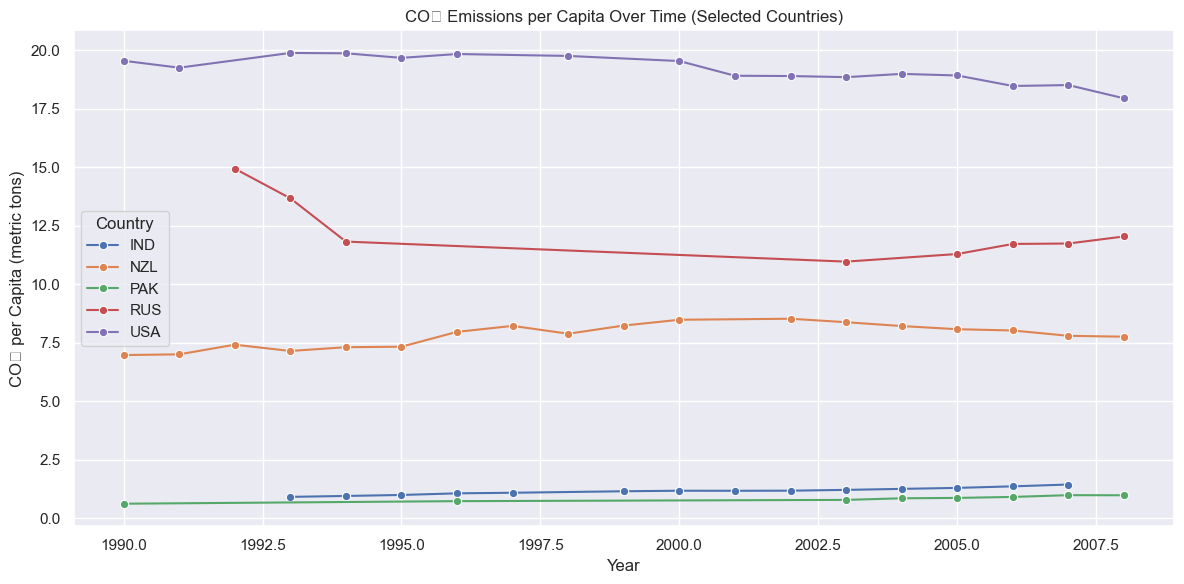

In [16]:
# CO₂ Emissions per Capita Over Time (Selected Countries)
# This line chart illustrates the CO₂ emissions per capita (in metric tons) over time for five selected countries: India (IND), New Zealand (NZL), Pakistan (PAK), USA, and Russia (RUS), spanning from the early 1990s to 2008.

# Select countries to compare
selected_countries = ['IND', 'USA', 'PAK', 'RUS', 'NZL']

# Use the correct DataFrame variable 'data' and column names 'country', 'year', and 'co2_per_cap'
df_selected = data[data['country'].isin(selected_countries)]

# Plot
plt.figure(figsize=(12, 6))
# Use the correct DataFrame variable 'df_selected' and column names 'year' and 'co2_per_cap' for plotting
sns.lineplot(data=df_selected, x='year', y='co2_per_cap', hue='country', marker='o')
plt.title('CO₂ Emissions per Capita Over Time (Selected Countries)')
plt.ylabel('CO₂ per Capita (metric tons)')
plt.xlabel('Year')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
# Insight:
# This comparison highlights stark differences in per capita emissions across developed and developing nations, and underscores the increasing trend in emissions for emerging economies like India and Pakistan.

# select only rows for half of the countries chosen randomly in order to ensure better visibility
chosen_countries=['IND', 'LMC', 'LMY', 'MAR', 'MEX', 'MIC', 'MNA', 'MOZ', 'MYS',
'NGA', 'NLD', 'NZL', 'PAK', 'PAN', 'PER', 'PHL', 'PRT', 'PRY',
'ROM', 'SAS', 'SAU', 'SDN', 'SEN', 'SLV', 'SSA', 'SWE', 'SYR',
'TGO', 'THA', 'TUR', 'TZA', 'UMC', 'URY', 'USA', 'VEN', 'VNM',
'WLD', 'ZAF', 'ZAR', 'ZMB', 'ECA', 'POL', 'RUS', 'UKR', 'YEM',
'ETH', 'BEL']

features_chosen = features_all[features_all['country'].isin(chosen_countries)]


# 7. Create plots and visualizations
The visualization is organized in a way that global overview of the data and dependencies is presented first, followed by more and more detailed representations of the more relevant relationships.

In [ ]:
# A global look onto all relationships
# Scatter plots of all chosen variables and countries will give a first impression of possible trends:

sns.set_theme(font_scale=1.3)
sns.pairplot(data=features_chosen, hue='country')

In [ ]:
# To enhance clarity, ARE data points were removed, and the updated plots are presented below:

# choose features and label columns
feature_cols = ['country', 'cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'pop_urb_aggl_perc',
                    'prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc', 'co2_per_cap']

# Keep as DataFrame for filtering
features_for_plot = data[feature_cols].copy() # Create a copy to avoid SettingWithCopyWarning

# remove the ARE outliers from the DataFrame used for plotting
features_for_plot = features_for_plot[features_for_plot['country']!='ARE']

In [ ]:
# The following plot shows the relationsip between 4 variables:

# 4d plot

sns.set_theme(style="whitegrid", font_scale=2)

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=features_for_plot, # Use the DataFrame specifically prepared for plotting
    x="urb_pop_growth_perc", y="co2_per_cap",
    hue="en_per_cap", size="pop_urb_aggl_perc",
    palette=cmap, sizes=(10, 200),
    height=10, aspect= 4/3
)

g.ax.set_xlabel(labels_dict['urb_pop_growth_perc'])
g.ax.set_ylabel(labels_dict['co2_per_cap'])

# Conclusions
Targeted plotting and correlation analysis have provided useful insights for predictive modeling:

* CO₂ emissions per capita and energy use per capita exhibit strong relationships with multiple socio-economic and environmental indicators and will be retained for model development.

* Total population shows less consistent predictive power across visualizations and correlation analyses, suggesting it may be less relevant and can be excluded.

* Among the three units of measurement (per capita, per GDP, total), per capita measures for both CO₂ emissions and energy use exhibit clearer patterns and stronger correlations.

* The relationship between CO₂ emissions and variables such as GDP, GNI per capita, urbanization, and FDI shows a combination of linear and nonlinear trends, often differing across countries and development levels.

* Country-specific outliers, especially high-income nations like the UAE, deviate from global trends and may skew predictive models if not treated properly.

* The presence of both global patterns and regional clusters supports using nonlinear, cluster-aware models (e.g., Random Forests, Gradient Boosting) over linear regression approaches.